<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-assignments-1-3/blob/main/KNNClassifier(Zoo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean, cityblock, minkowski
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
path = r"/content/Zoo.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df = df.drop('animal name', axis=1)

In [5]:
print(df.head())

   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  type  
0         1         0     0     4     0         0        1     1  
1         1         0     0     4     1         0        1     1  
2         0         0     1     0     1         0        0     4  
3         1         0     0     4     0         0        1     1  
4         1         0     0     4     1         0        1     1  


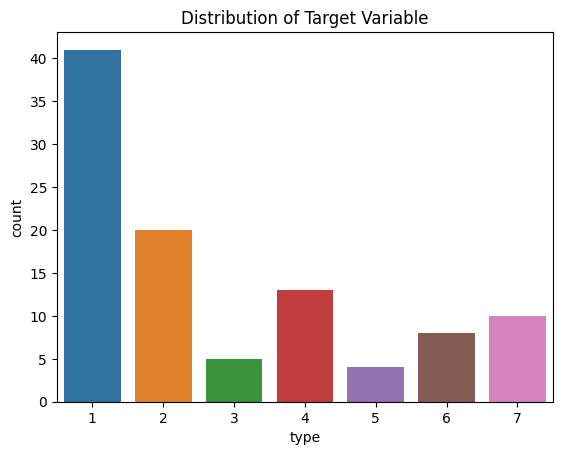

In [6]:
sns.countplot(x='type', data=df)
plt.title('Distribution of Target Variable')
plt.show()

In [7]:
point1 = df.loc[0, df.columns[1:]]
point2 = df.loc[1, df.columns[1:]]
euclidean_dist = euclidean(point1, point2)
manhattan_dist = cityblock(point1, point2)
minkowski_dist = minkowski(point1, point2, p=3)

print('Euclidean Distance:', euclidean_dist)
print('Manhattan Distance:', manhattan_dist)
print('Minkowski Distance:', minkowski_dist)

Euclidean Distance: 1.4142135623730951
Manhattan Distance: 2
Minkowski Distance: 1.2599210498948732


In [8]:
X = df.drop('type', axis=1)
y = df['type']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn.predict(X_test)

In [12]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


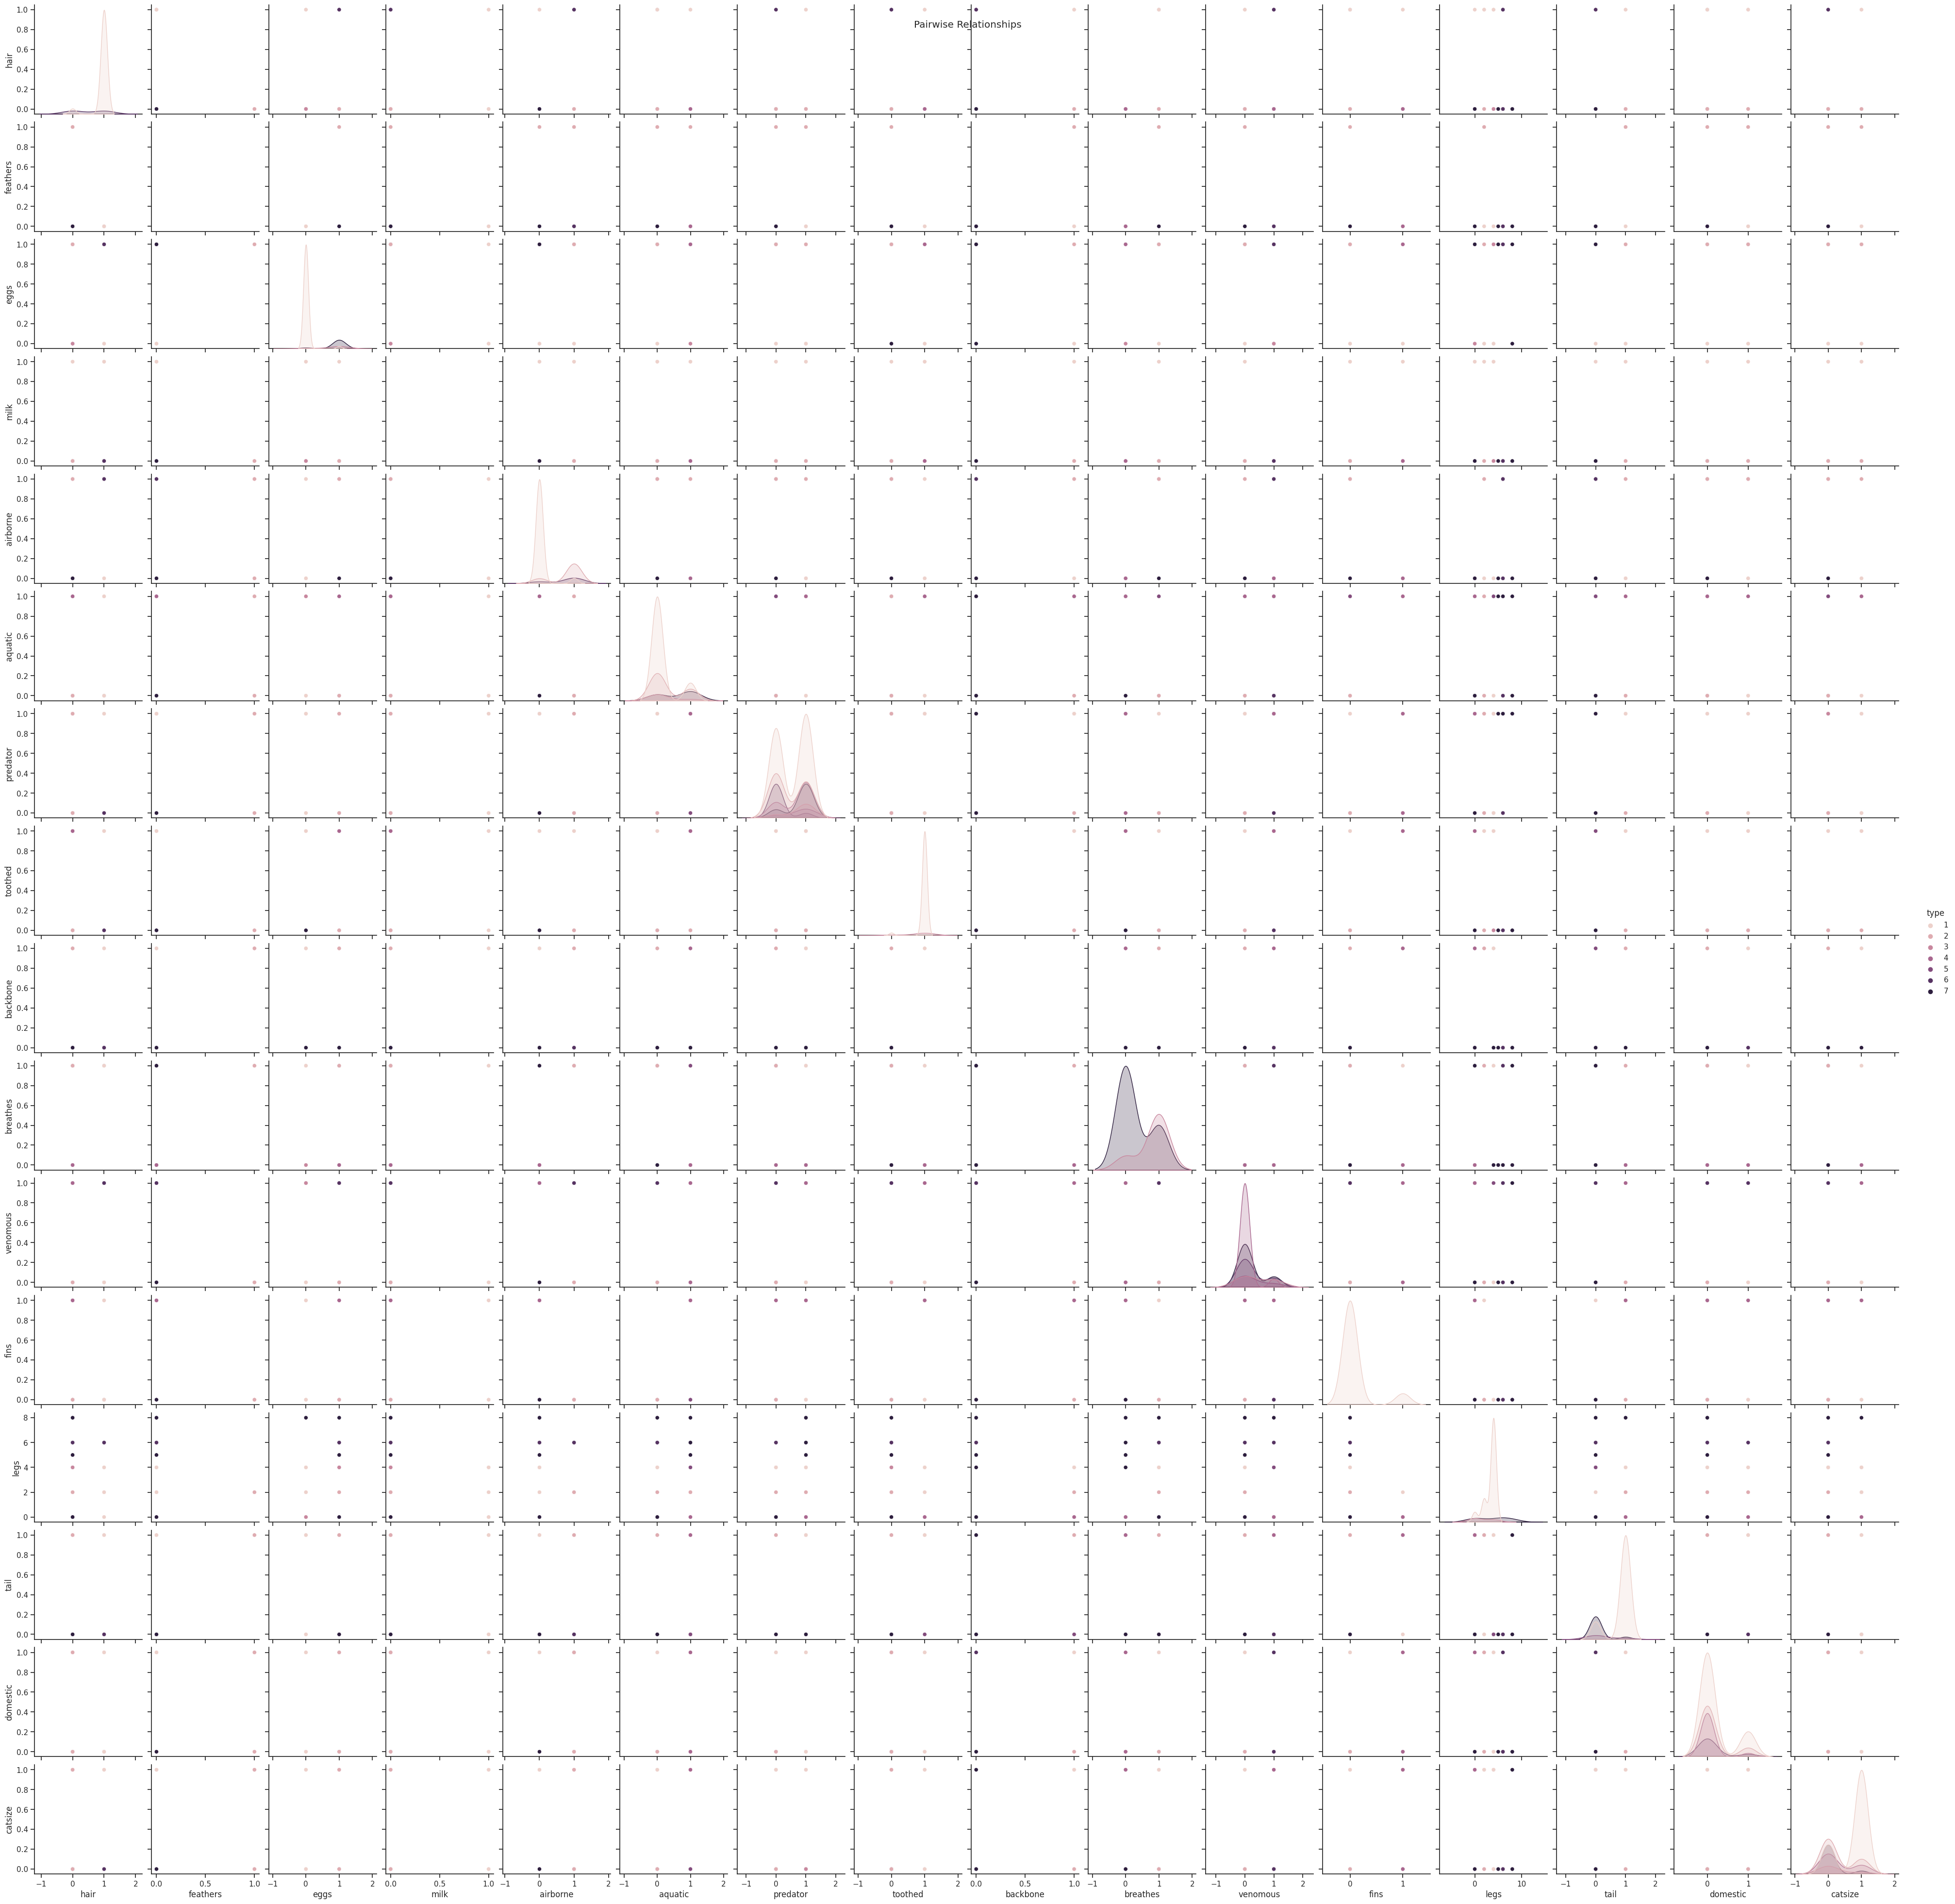

In [16]:
sns.set(style="ticks")
pairplot = sns.pairplot(df, hue='type')
pairplot.fig.suptitle('Pairwise Relationships')
plt.show()

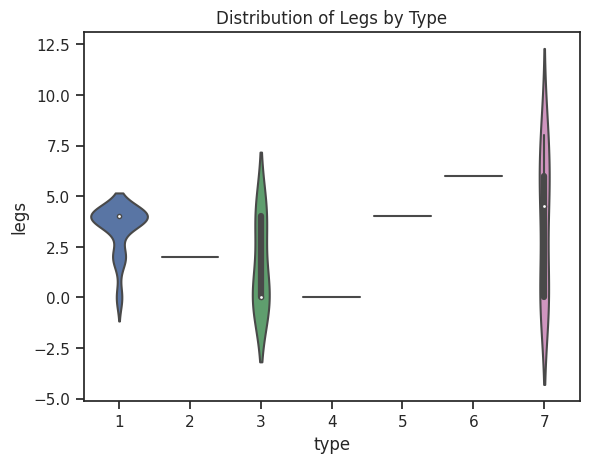

In [18]:
sns.violinplot(x='type', y='legs', data=df)
plt.title('Distribution of Legs by Type')
plt.show()

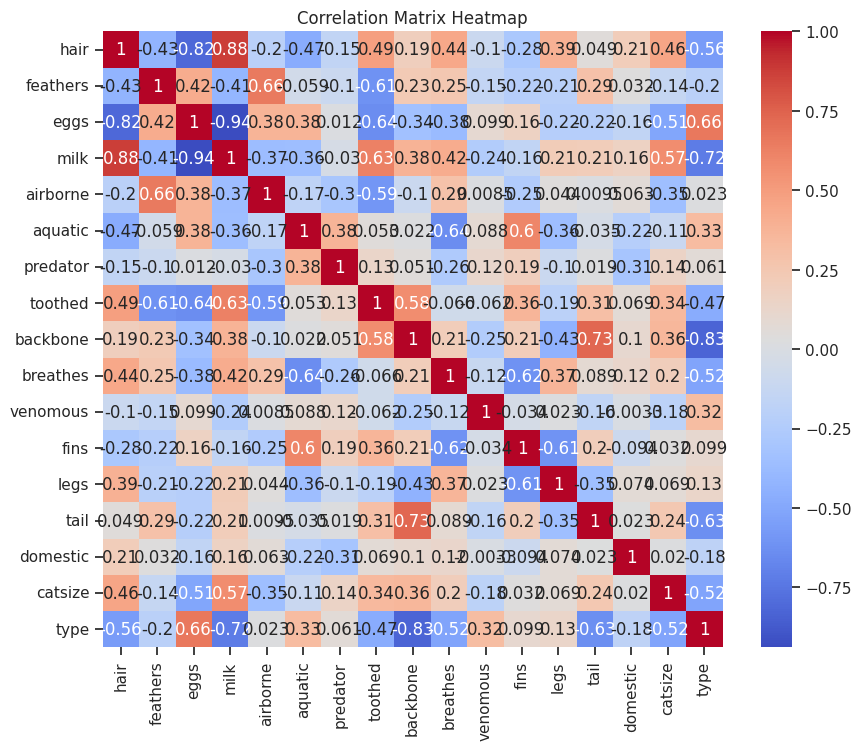

In [17]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Matrix Heatmap')
plt.show()